In [1]:
# %pip install -U albumentations

In [10]:
import pandas as pd
import numpy as np

import torch
import h5py

import torch
import torch.nn as nn
import torchvision.transforms as transforms

import albumentations as A
from albumentations.pytorch import ToTensorV2

import cv2
import io
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
df = h5py.File('./train-image.hdf5')
dfMeta = pd.read_csv('./train-metadata.csv', low_memory = False)

In [12]:
df

<HDF5 file "train-image.hdf5" (mode r)>

In [13]:
isic_id = dfMeta.isic_id.iloc[0]
isic_id

'ISIC_0015670'

In [14]:
byte_string = df[isic_id][()]
byte_string[:20]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00'

In [17]:
image = Image.open(io.BytesIO(byte_string)).convert("RGB")


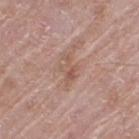

In [18]:
image

In [27]:
augmentations = A.Compose([
    A.Resize(224, 224),  # Resize the image
    A.HorizontalFlip(p=0.5),  # Random horizontal flip
    A.RandomBrightnessContrast(p=0.3),  # Adjust brightness & contrast
    A.Rotate(limit=30, p=0.5),  # Rotate up to 30 degrees
    A.GaussNoise(p=0.2),  # Add random noise
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),  # Normalize
    ToTensorV2()  # Convert to PyTorch tensor
])

In [28]:
image = np.array(image)  # Convert to numpy array for OpenCV compatibility
augmented = augmentations(image=image)  # Apply augmentations
image_tensor = augmented["image"].unsqueeze(0)  # Add batch dimension
# image, augmented["image"]

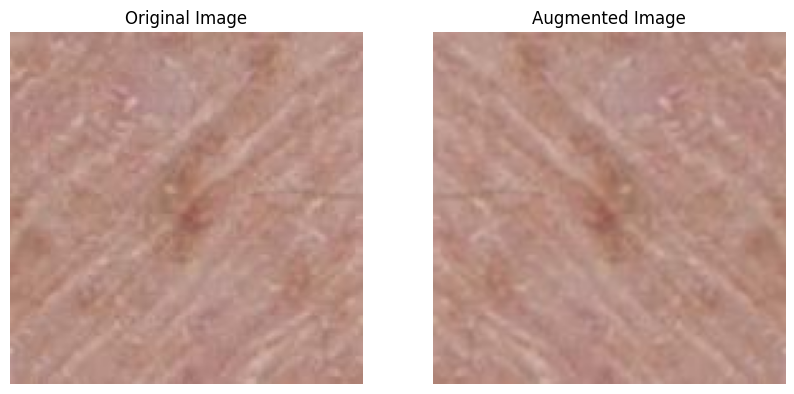

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Convert augmented image tensor to numpy for visualization
aug_np = augmented["image"].permute(1, 2, 0).numpy()  # (C, H, W) -> (H, W, C)
aug_np = (aug_np * 0.5) + 0.5  # Denormalize

# Show augmented image
axes[1].imshow(aug_np)
axes[1].set_title("Augmented Image")
axes[1].axis("off")

plt.show()